In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("Spotify_tracks.csv")

In [3]:
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Select only necessary features for clustering
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

#Number of rows (data points) with outliers 
tracks.shape[0]

114000

In [5]:
# The KMeans model is overly sensitive to outliers for several reasons. First, in order to create clusters, the KMeans model works to minimize the distance between points and the centroid in one cluster, which is negatively affected when an outlier point is present. More so, the outlier pulls the centroid of the cluster closer to itself, which leads to a suboptimal clustering of the other data points. Finally, in a KMeans model, all points have the same exact weight, so an outlier has a disproportianate effect on the clustering boundaries.    
# Thus, in order to fix the outlier issue and create the optimal fit clusters for the majority of the data points, we chose to remove the outliers. 

#In order to remove the outliers, we must first calculate the z-scores (# of standard deviations from the mean), for each feature
# Calculate the z-scores for each feature
z_scores = np.abs(stats.zscore(tracks))

# Calculate the mean z-score for each data point
mean_z_scores = np.mean(z_scores, axis=1)

# Remove outliers from the dataset (that are not within 2.25 standard deviations)
tracks_with_no_outliers = tracks[mean_z_scores <= 2.25]

#Number of rows (data points) without outliers 
tracks_with_no_outliers.shape[0]

113880

/Users/GaryMaimon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/GaryMaimon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/GaryMaimon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/GaryMaimon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


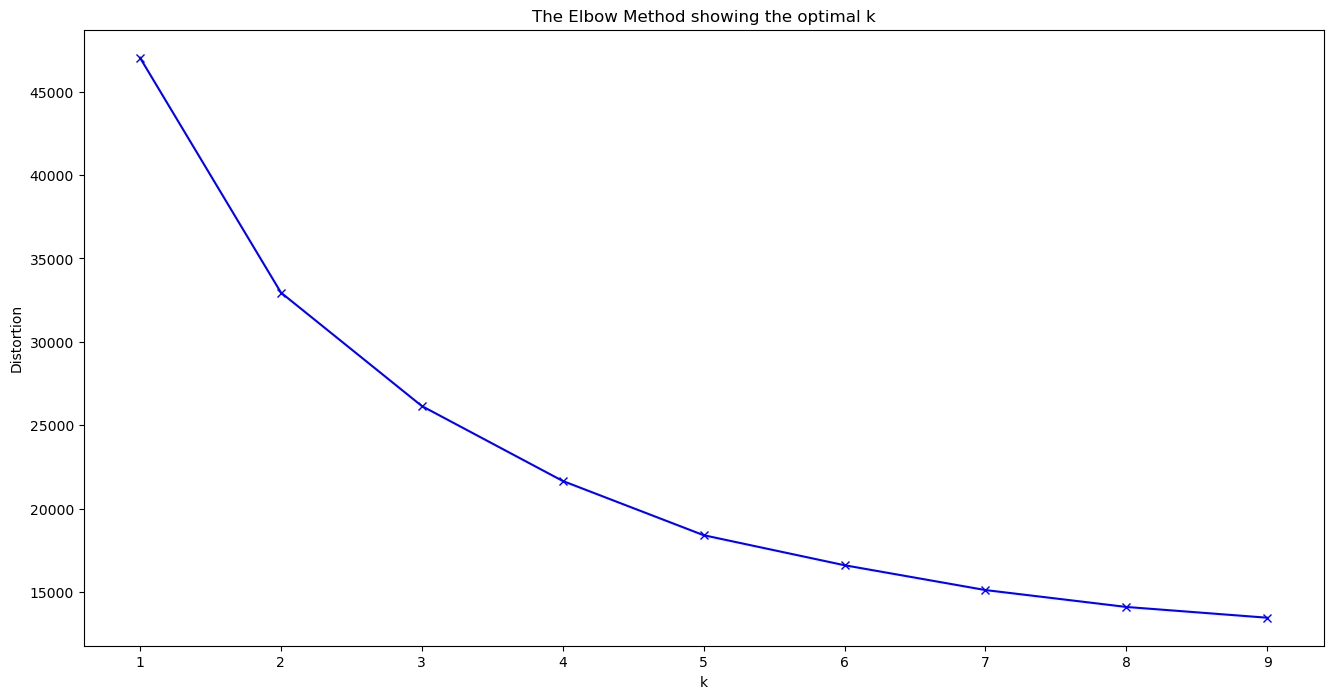

In [6]:
#For optimizing the number of clusters, we looked at two techniques: elbow technique and silhoutte coefficient. 
# Elbow Coefficient - For this method, we must make a chart to find the "elbow" (# of optimal clusters)


distortions = []
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(tracks_with_no_outliers)
    distortions.append(kmeans_model.inertia_)
    
#Generate plot 
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
#We could see that after the 4th x-point (cluster), the rate of decrease shifts. Thus, it can be considered the "elbow" or optimal number of clusters. 

In [8]:
#Silhoutte coefficient method - Next, we will look at the silhoutte coefficient technique, which calculates silhoutte scores (measure of how well separated the clusters are and how well each data point is assigned to a cluster). Higher values on a sclae of [-1, 1] indicate better clustering.
 
#silhouette_scores = []
#for k in range(2, 10):
        #kmeans_model = KMeans(n_clusters=k)
        #kmeans_model.fit(tracks_with_no_outliers)
        #labels = kmeans_model.labels_
        #score = silhouette_score(tracks_with_no_outliers, labels)
        #silhouette_scores.append(score)

# Plot the silhouette method graph
#plt.figure(figsize=(8, 6))
#plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
##plt.xlabel('Number of Clusters (K)')
#plt.ylabel('Silhouette Score')
#plt.title('Silhouette Method for Optimal K')
#plt.xticks(range(2, max_clusters + 1))
#plt.grid(True)
#plt.show()



In [9]:
#Although there is slight subjectivety associated with the elbow method, we will be using it over the silhoutte method beceause of how computationlly expensive the silhouttee method is. In fact, we couldn't even plot the graph in a rational amount of time because of how large our data set was and how computationally expensive the silhouette coefficient method is. 

In [10]:
#Exploring different clustering algorithims 
#Two other clustering algorithims we considered are the KMedians and DBSCAN
#1. KMedians - We considered that this clustering method may be superior to KMeans because it calculates the centroid of each cluster as the MEDIAN of the data points, rather than the MEAN. Thus, it is less sensitive to outliers in a data set, which in turns enables better performance. 
#2. DBSCAN - This method can be considered superior to KMeans because it does not require specifying the # of clusters in advance, which makes the process of clustering significanlty more efficient (no need to use silhoiutte coeff) and less subjective (no need to analyze KMeans graph). More so, DBSCAN handles outliers as noise, which prevent the outlier issue present in KMeans. 